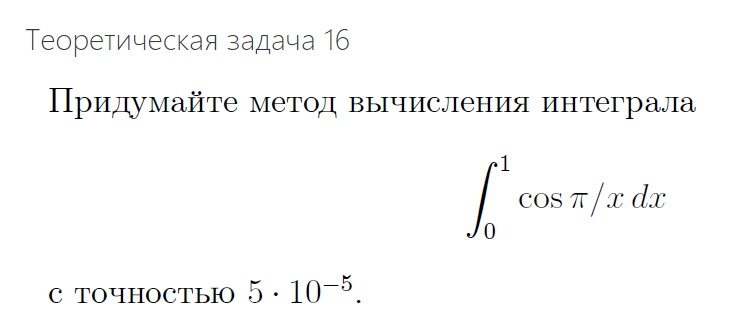

[WolframAlpha](https://www.wolframalpha.com/input?i=int+cos+%28pi%2Fx%29+dx+from+0+to+1)

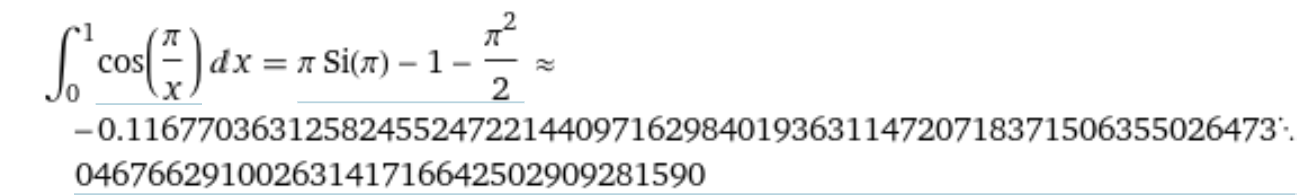

Рассчитаем $Si(\pi)$ с помощью частичной суммы [ряда](https://www.wolframalpha.com/input?i=Si%28pi%29)

$$Si(\pi) = \sum_{k=0}^\infty \frac{(-1)^k \pi^{1+2k}}{(1+2k)(1+2k)!}$$

In [40]:
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.4)
plt.style.use("dark_background")
sns.set_palette(sns.color_palette("Paired"))


Si = 0
for k in range(85):  # 86! is too big
    Si += ((-1) ** k * np.pi ** (1 + 2 * k)) / ((1 + 2 * k) * math.factorial(1 + 2 * k))

In [41]:
np.pi * Si - 1 - np.pi**2 / 2

-0.11677036312582345

Воспользуемся методом Симсона [формула парабол](https://swsu.ru/structura/up/fivt/kvm/integrals.pdf):

$$\int_a^b f(x)dx = \frac{b-a}{6n} \left(f(a) + f(b) + 2\sum_{k=1}^{n-1} f(x_{2k}) + 4\sum_{k=1}^n f(x_{2k-1})\right) + R$$
где $R\ -$ остаточный член.
$$R = -\frac{(b-a)^5}{2880n^4}f^{(4)}(\eta)$$
При этом, ошибка имеет порядок $\left(\frac{b-a}{n}\right)^5$.

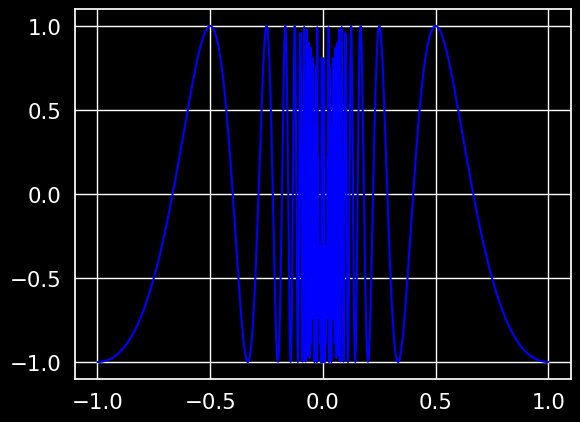

In [42]:
import matplotlib.pyplot as plt

def f(x):
    return np.cos(np.pi / x)


x = np.linspace(-1, 1, 1000)
y = f(x)
plt.plot(x, y, color='blue');

Вместо интегрирования по [0,1] (где приходится бороться с $cos(\frac{\pi}{x})$ в нуле), интегрируем по [-1,1] и делим пополам $\left(cos(x) = cos(-x)\right)$:

In [43]:
from scipy import integrate
x = np.linspace(-1, 1, 100000000)
integrate.simpson(f(x)/2, x=x)

-0.11677050040254681

Добились желаемой точности